In [62]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics

# Explore Data

In [86]:
data = pd.read_csv('D:/Office Work/Deific/Real Estate/king country house sales data/kc_house_data.csv')

In [87]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [88]:
len(data)

21613

In [89]:
data.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [90]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Preprocessing

In [92]:
#dropping columns
df = data.copy()
data.drop(['id', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

In [93]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [94]:
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
grade              int64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<AxesSubplot:>

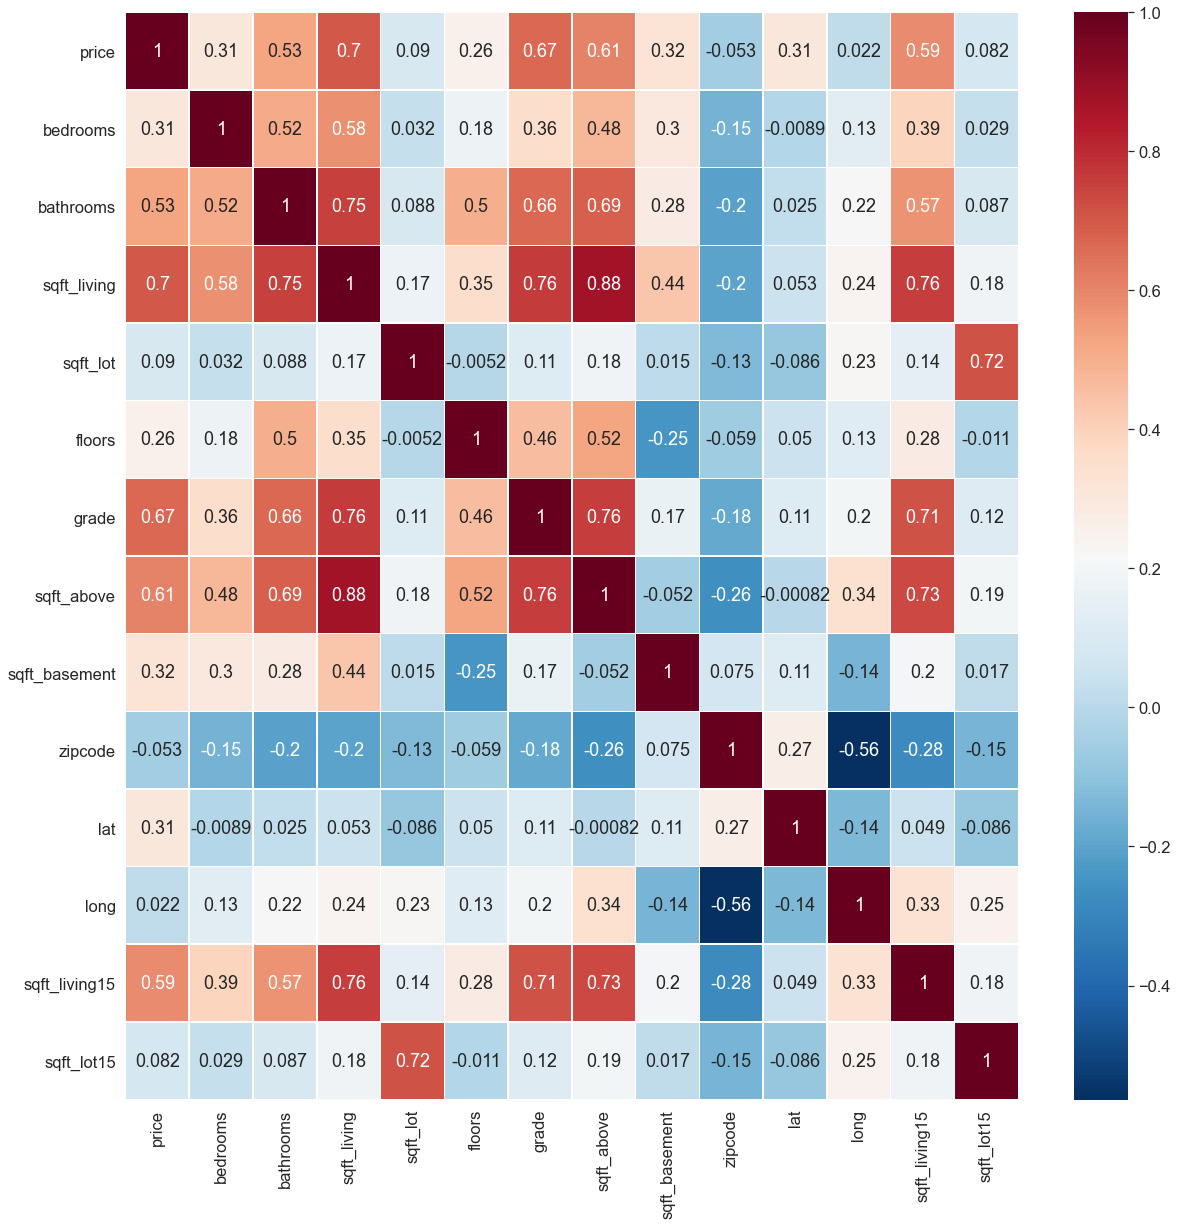

In [95]:
plt.subplots(figsize=(20,20))

pearson_corr = data.corr(method='pearson')
sb.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [96]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


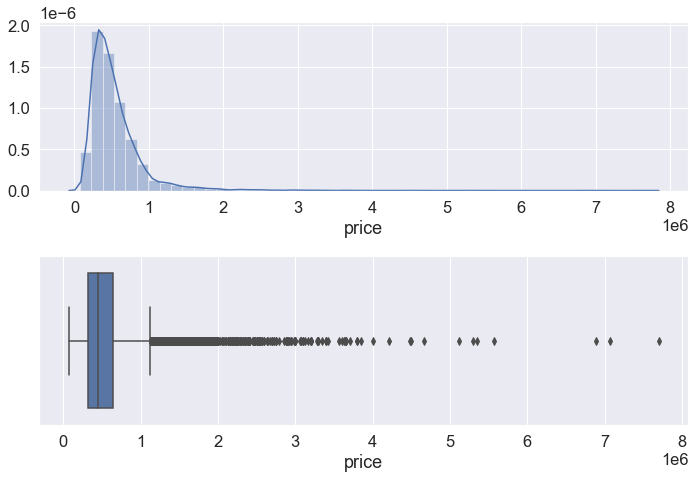

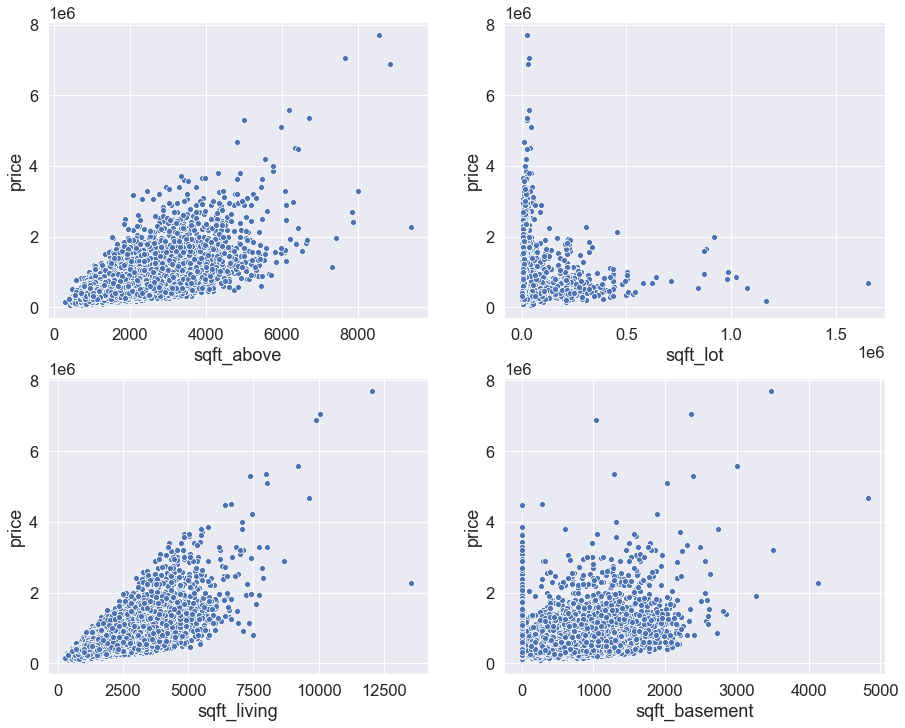

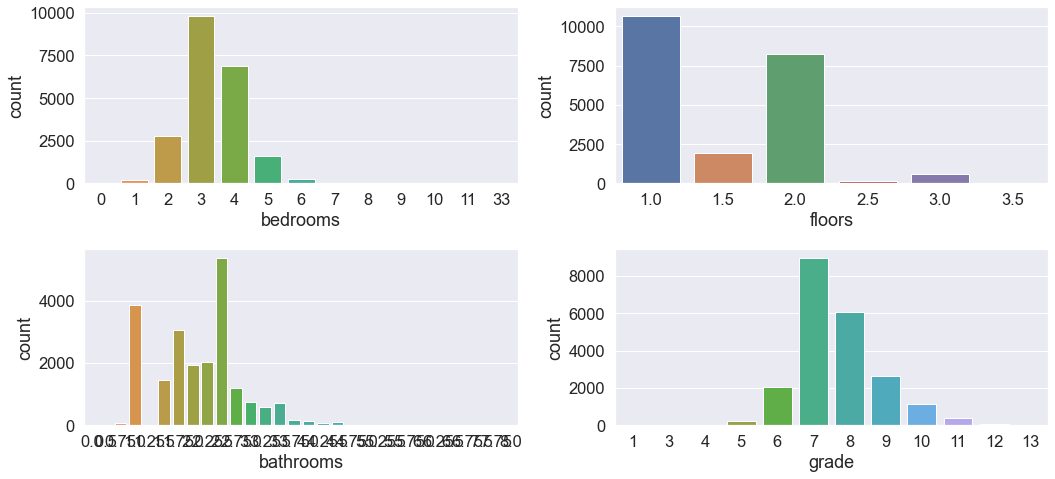

In [97]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sb.distplot(data['price'])
fig.add_subplot(2,1,2)
sb.boxplot(data['price'])
plt.tight_layout()
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(15,12))
fig.add_subplot(2,2,1)
sb.scatterplot(data['sqft_above'], data['price'])
fig.add_subplot(2,2,2)
sb.scatterplot(data['sqft_lot'],data['price'])
fig.add_subplot(2,2,3)
sb.scatterplot(data['sqft_living'],data['price'])
fig.add_subplot(2,2,4)
sb.scatterplot(data['sqft_basement'],data['price'])
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sb.countplot(data['bedrooms'])
fig.add_subplot(2,2,2)
sb.countplot(data['floors'])
fig.add_subplot(2,2,3)
sb.countplot(data['bathrooms'])
fig.add_subplot(2,2,4)
sb.countplot(data['grade'])
plt.tight_layout()


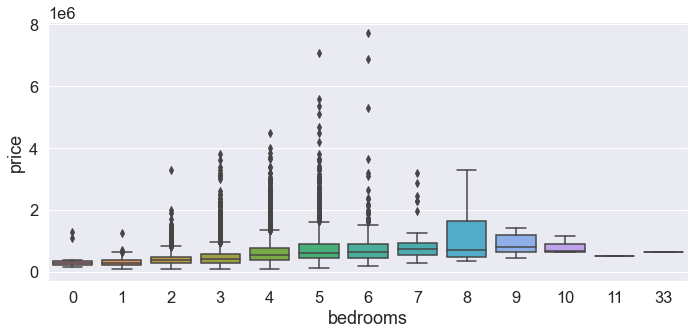

In [98]:
fig = plt.figure(figsize=(10, 5))
sb.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
sb.boxplot(x=data['bedrooms'],y=data['price'])
plt.tight_layout(); plt.show()

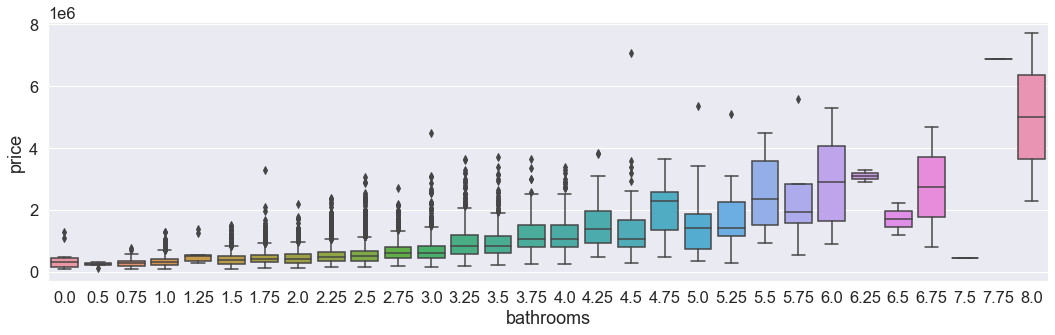

In [99]:
fig = plt.figure(figsize=(15, 5))
sb.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
sb.boxplot(x=data['bathrooms'],y=data['price'])
plt.tight_layout(); plt.show()

In [100]:
#removing some outliers like bedrooms which contains 0,11, 33, rooms
print(len(data))
indexNames = data[data.bedrooms == 11].index
data.drop(indexNames , inplace=True)
print(len(data))
indexNames = data[data.bedrooms == 33].index
data.drop(indexNames , inplace=True)
print(len(data))
indexNames = data[data.bedrooms == 0].index
data.drop(indexNames , inplace=True)
print(len(data))
indexNames = data[data.bathrooms == 0].index
data.drop(indexNames , inplace=True)
print(len(data))

21613
21612
21611
21598
21595


In [101]:
#converting date column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date:date.month)
data['year'] = data['date'].apply(lambda date:date.year)
#data visualization house price vs months and years
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,7,1180,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,7,2170,400,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,6,770,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,7,1050,910,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,8,1680,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year'>

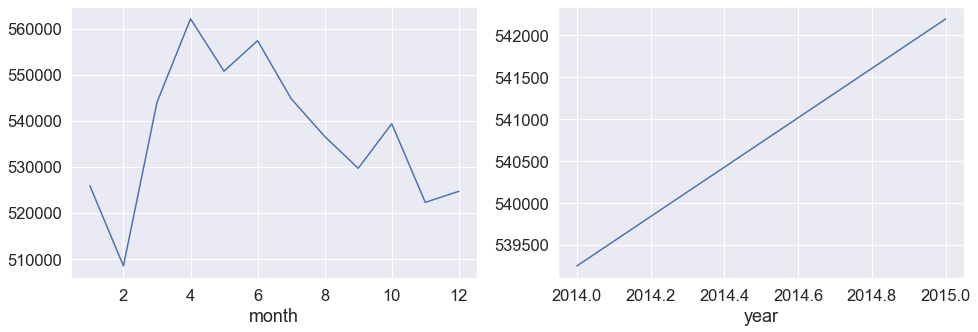

In [102]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
data.groupby('year').mean()['price'].plot()

In [21]:
data.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [22]:
data.grade.unique()

array([7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1], dtype=object)

In [103]:
#converting categorical columns into numerical values
temp = data.copy()

le = preprocessing.LabelEncoder()
data['floors_encoded'] = le.fit_transform(data['floors'])
data['grade_encoded'] = le.fit_transform(data['grade'])

In [104]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,floors_encoded,grade_encoded
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,7,1180,0,98178,47.5112,-122.257,1340,5650,10,2014,0,4
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,7,2170,400,98125,47.7210,-122.319,1690,7639,12,2014,2,4
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,6,770,0,98028,47.7379,-122.233,2720,8062,2,2015,0,3
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,7,1050,910,98136,47.5208,-122.393,1360,5000,12,2014,0,4
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,8,1680,0,98074,47.6168,-122.045,1800,7503,2,2015,0,5


In [105]:
del data['date'],
del data['floors']
del data['grade']
del data['sqft_living15']
del data['sqft_lot15']

<AxesSubplot:>

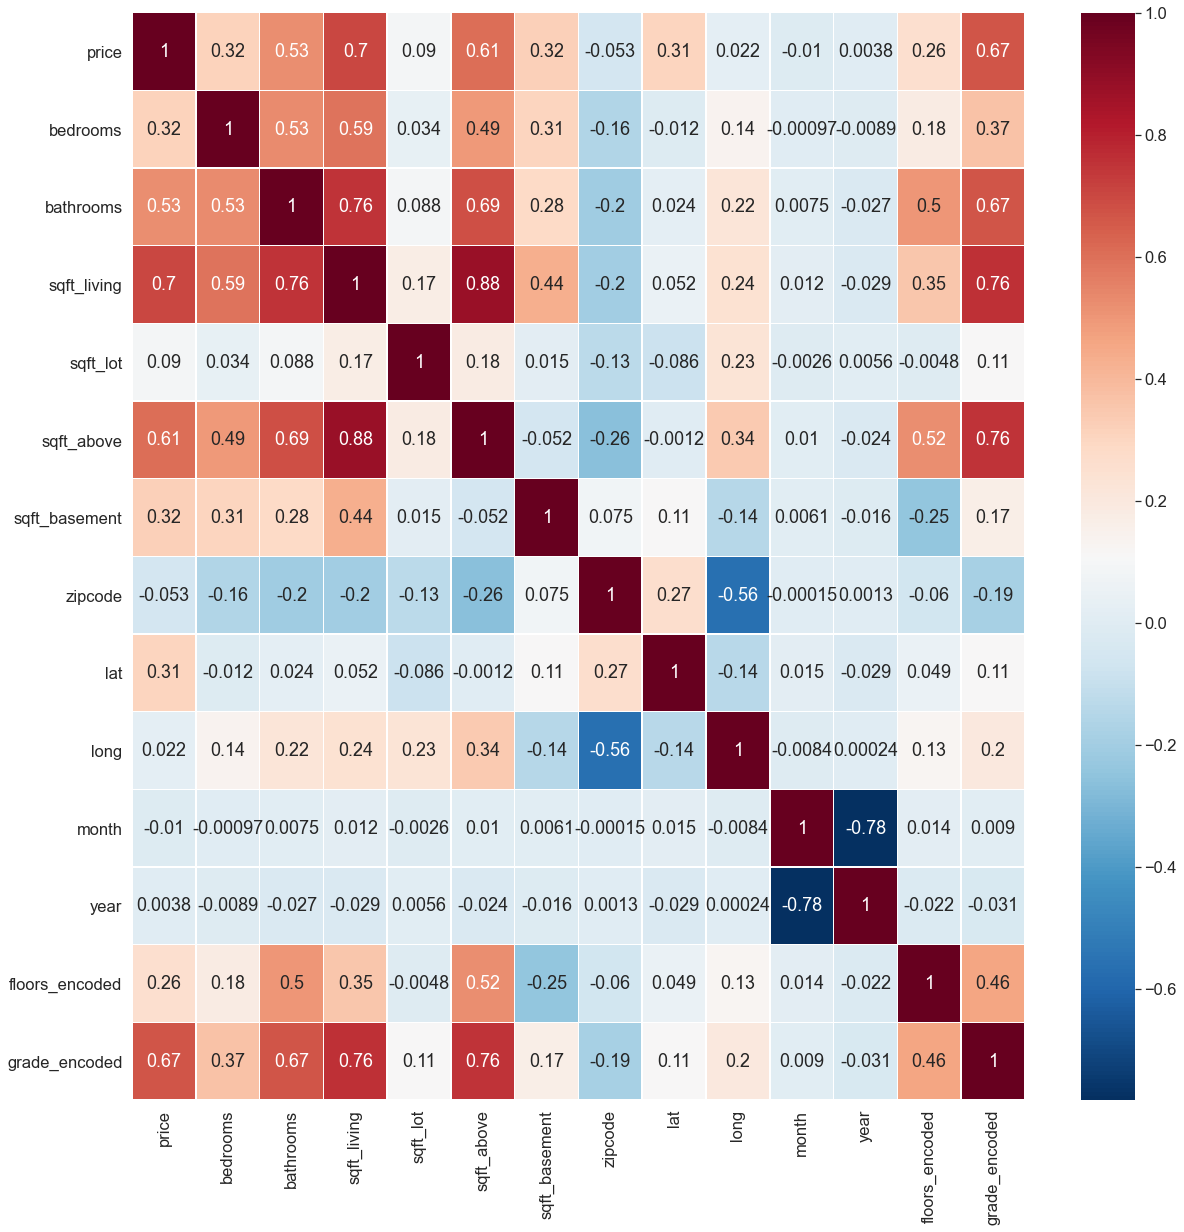

In [106]:
plt.subplots(figsize=(20,20))

pearson_corr = data.corr(method='pearson')
sb.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

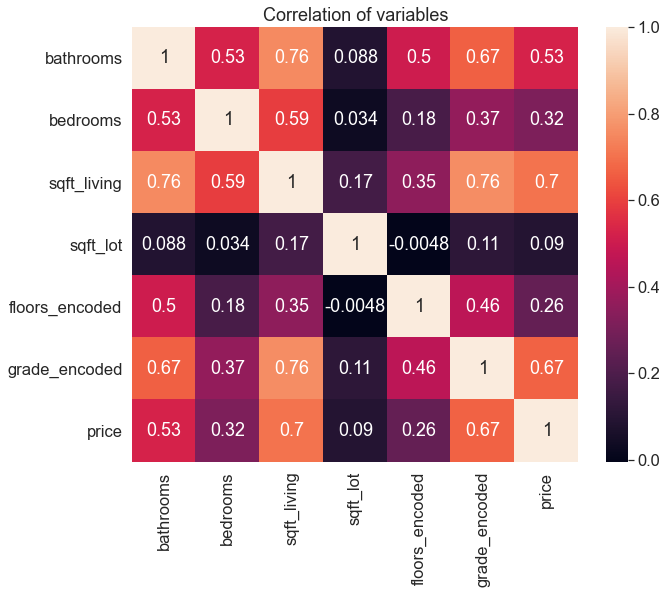

In [107]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors_encoded', 'grade_encoded', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sb.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

# Prediction

In [108]:
X = data.drop("price",axis=1).values
y = data["price"].values

In [116]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

d:\setup installation\python installation\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Linear Regression: 0.623914 (+/- 0.016336)
Ridge Regression: 0.623995 (+/- 0.016123)
Lasso: 0.578013 (+/- 0.022086)
SVR: 0.544422 (+/- 0.008546)
Random Forest_reg: 0.839065 (+/- 0.016777)
XGB_reg: 0.837576 (+/- 0.017948)
Decision Tree_reg: 0.694819 (+/- 0.053218)
KNN_reg: 0.738288 (+/- 0.017661)


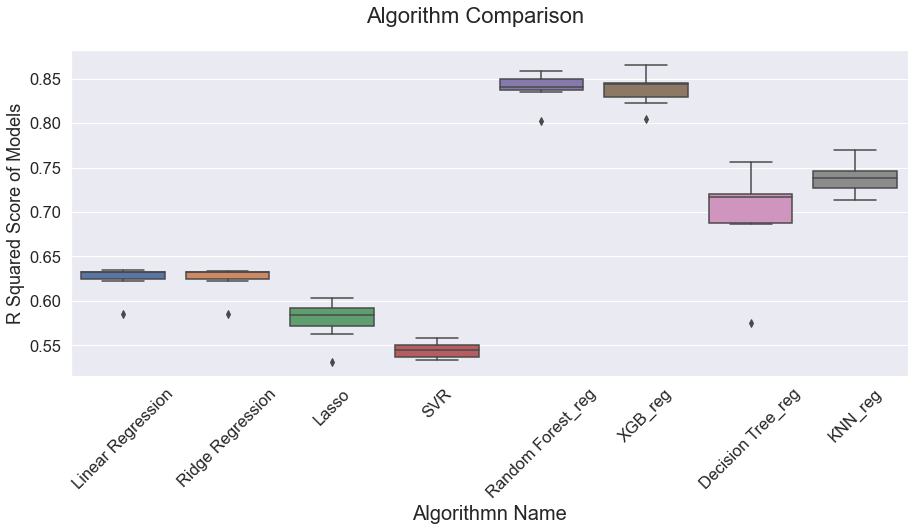

In [117]:
pipelines = []
seed = 2

pipelines.append(
                ("Linear Regression", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Linear Regression", linear_model.LinearRegression())
                      ]))
                )


pipelines.append(
                ("Ridge Regression", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
    
pipelines.append(
                ("Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )

pipelines.append(
                ("SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Random Forest_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )


pipelines.append(
                ("XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Decision Tree_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))



scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sb.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [118]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train)
y_hat = xgb.predict(X_test)
xgb.score(X_test,y_test)


0.8499507269823711

In [119]:
print("XGBoost Regressor R2-score: {}".format(round(metrics.r2_score(y_hat, y_test),4)))
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))  
print('MSE:', metrics.mean_squared_error(y_test, y_hat))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('VarScore:',metrics.explained_variance_score(y_test,y_hat))

XGBoost Regressor R2-score: 0.8065
MAE: 75074.80675503588
MSE: 21936401946.24728
RMSE: 148109.42558205835
VarScore: 0.8499584833321957


In [115]:
##  TESTING
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf.fit(X_train, y_train)
clf.score(X_test,y_test)


0.8587661167050971